# Name : Mohamed Moustafa Elsayed Ahmed
# Email  : o.ahmed@innopolis.university
# Project : Stanford-Arm Control

# 1- Schematic Digram

> 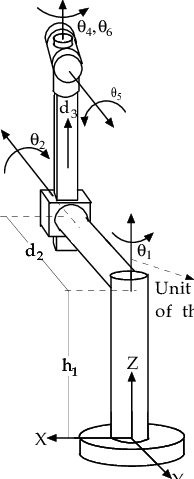
>>>>> .







# 2- Dynamics


\begin{equation}
\mathbf{u} = \mathbf{D}(\mathbf{q})\ddot{\mathbf{q}} + \mathbf{h}(\mathbf{q},\dot{\mathbf{q}})= \mathbf{Y}(\mathbf{q},\dot{\mathbf{q}},\ddot{\mathbf{q}}) \mathbf{p}
\end{equation}

\\
\begin{equation}
\mathbf{D} = \begin{bmatrix}
d11
 & d12 & d13\\
d21 & d22 & d23 \\ d31 & d32 & d33
\end{bmatrix}\\
\rule{20cm}{0.4pt} \\
d11= I1 + I2 + I3 + (L2^2*m2)/4 + L2^2*m3 + (L3^2*m3)/8 + (m3*q3^2)/2 - (L3*m3*q3)/2 - (L3^2*m3*cos(2*q2))/8 - (m3*q3^2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2 \\
\rule{20cm}{0.4pt} \\
d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2 \\
\rule{20cm}{0.4pt} \\
d13= -L2*m3*sin(q2) \\
\rule{20cm}{0.4pt} \\
d21= (L2*m3*cos(q2)*(L3 - 2*q3))/2 \\
\rule{20cm}{0.4pt} \\
d22=  (m3*L3^2)/4 - m3*L3*q3 + m3*q3^2 + I2 + I3 \\ \rule{20cm}{0.4pt} \\
d23= 0 \\ \rule{20cm}{0.4pt} \\
d31=  -L2*m3*sin(q2) \\ \rule{20cm}{0.4pt} \\
d32= 0 \\ \rule{20cm}{0.4pt} \\
d33= m3 \\ \rule{20cm}{0.4pt} \\

\end{equation}

\
\begin{equation}

\mathbf{h} = \begin{bmatrix}
h1  \\
h2\\
h3 \end{bmatrix} \\ 
\rule{30cm}{0.4pt} \\
h1= b1*dq1 - dq2*(L2*dq3*m3*cos(q2)) - dq1*(m3*sin(2*q2)*L3^2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3^2)/2 + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2 - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)^2 + 2*dq1*q3*cos(q2)^2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
 \\ \rule{30cm}{0.4pt} \\
h2=b2*dq2 - dq2*dq3*m3*(L3 - 2*q3) - (dq1^2*m3*sin(2*q2)*(L3 - 2*q3)^2)/8 + g*m3*sin(q2)*(L3/2 - q3)
 \\ \rule{30cm}{0.4pt} \\
h3=(m3*(L3 - 2*q3)*dq2^2)/2 + b3*dq3 + g*m3*cos(q2) - (dq1^2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4
 \\ \rule{30cm}{0.4pt} \\

\end{equation}


# 3- Regressor & Paramter Vector

\begin{equation}
\mathbf{Y} = 
\begin{bmatrix}
 0 & ddq_{1} & 
dq_{1} & 
l_{2}^2 * ddq_{1}
& ddq_{1} &0 &  term_{1} & ddq_{1} & 0\\
0 & 0 & 0 & 
0 & ddq_{2} & dq_{2} & term_{2} & ddq_{2} & 0\\
0&0&0&0&0&0&term_{3}&0&dq_{3} 
\end{bmatrix}
\end{equation}
\\
\begin{equation}
\mathbf{P} = 
\begin{bmatrix}
m_1&I_1&b_1&m_2&I_2&b_2&m_3&I_3&b_3 
\end{bmatrix}
\end{equation}

# 4- PD Control

> ## 4.1 - Perfect guesses

>> ### 4.1.1- Fixed Trajectory

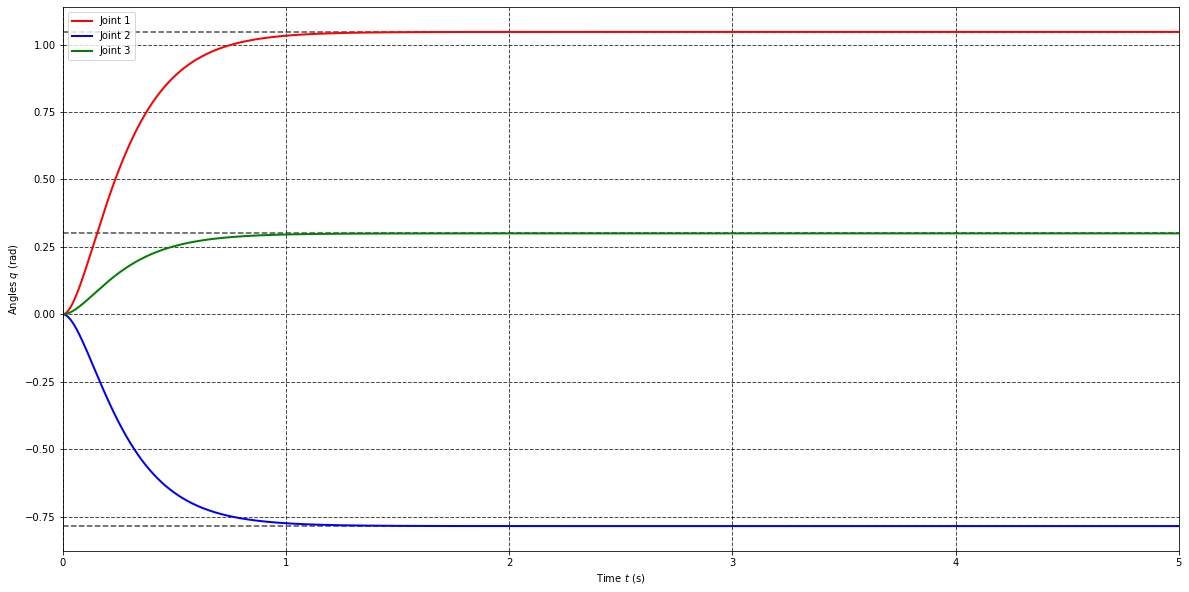

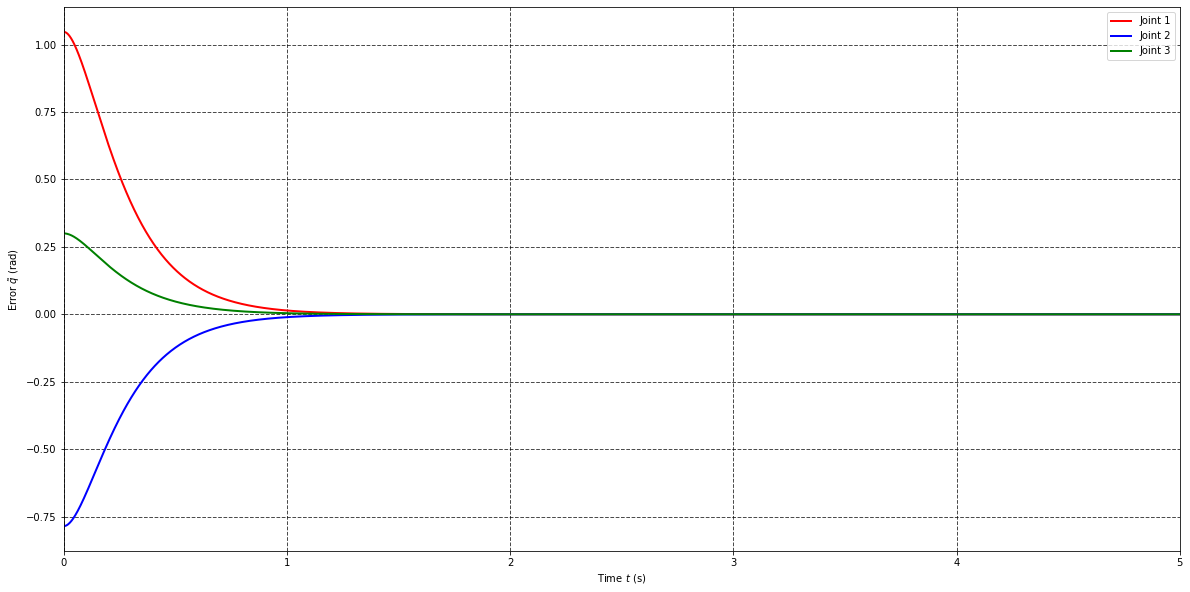

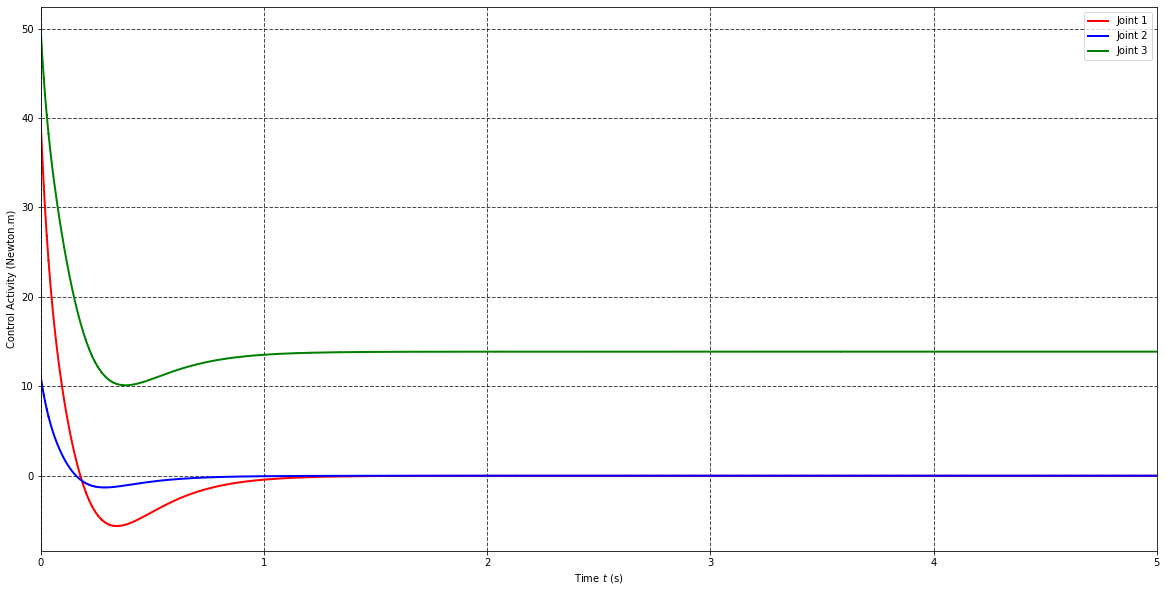

In [20]:
################################################################################################################
# 4.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv
from scipy.integrate import odeint
from matplotlib.pyplot import *
from numpy import ones

def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])


################################################################################################################
# 4.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y

################################################################################################################
# 4.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 4.1.4 Trajectory Function (Constant Trajectory)
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = trajectory_params['q_d']
    n = len(q_d)
    dq_d = zeros(n)
    ddq_d  = zeros(n)
    return q_d, dq_d, ddq_d

################################################################################################################
# 4.1.5 Params
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81
params = l, m, J, b, g


trajectory_params  = {'q_d':[pi/3, -pi/4, 0.3]}

                     
K1 = diag([50, 50 ,50])
K2 = diag([15, 15 ,15])
gains = K1, K2

# Exact controller
control_params = trajectory_params, gains, params


################################################################################################################
# 4.1.6 PD_Controller
################################################################################################################

def control_PD(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params, gains, params_hat = control_params
    
    l, m, J, b, g = params_hat

    q_d, dq_d, ddq_d = trajectory(t, trajectory_params)
    #q_d, dq_d, ddq_d = trajectory(t, control_params[0])
    K1, K2 = gains
    v =  ddq_d + dot(K1, q_d - q) + dot(K2, dq_d - dq)

    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    u = dot(regressor(q, dq, v , l, g), p)
    control_activity.append(u)
    time_list.append(t)

    return u    


################################################################################################################
# 4.1.7 Plot
################################################################################################################

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
control_activity=[]
time_list=[]
x0=[0,0,0,0,0,0]
sol = odeint(sysode, x0, t, 
             args=(control_PD, params, control_params,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox,alpha_3_aprox = q_aprox[:,0], q_aprox[:,1],q_aprox[:,2]
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

hlines( trajectory_params['q_d'][0],t0,tf, color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][1],t0,tf, color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][2],t0,tf, color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, trajectory_params['q_d'][0]*ones(len(alpha_1_aprox)) - alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, trajectory_params['q_d'][1]*ones(len(alpha_2_aprox)) - alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, trajectory_params['q_d'][2]*ones(len(alpha_3_aprox)) - alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

>> ### 4.1.2- Sine wave Trajectory

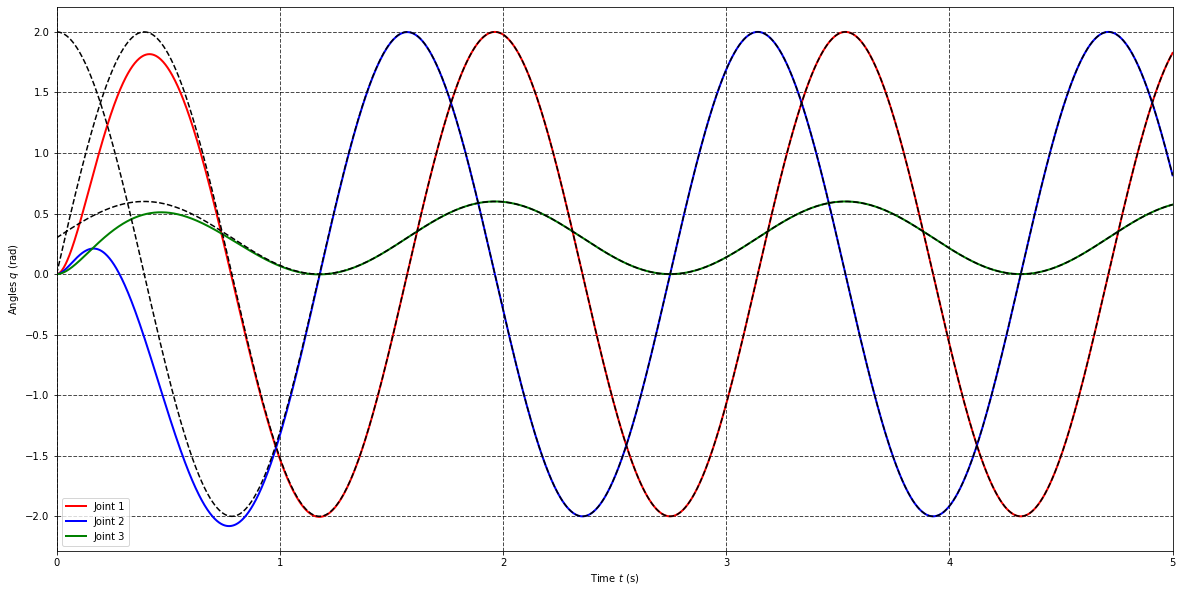

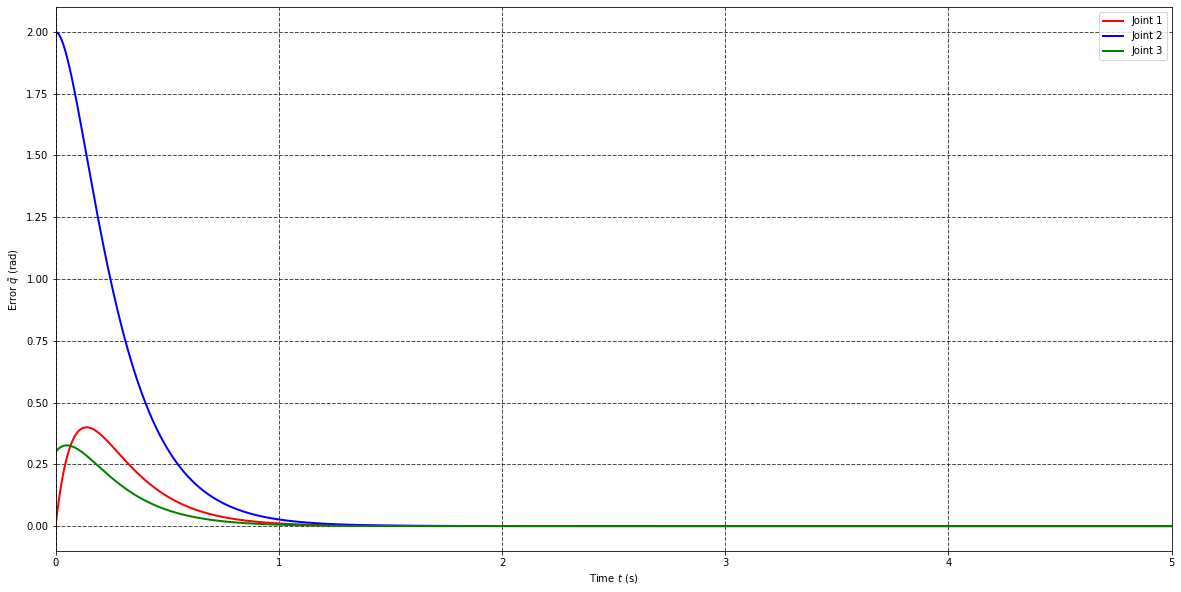

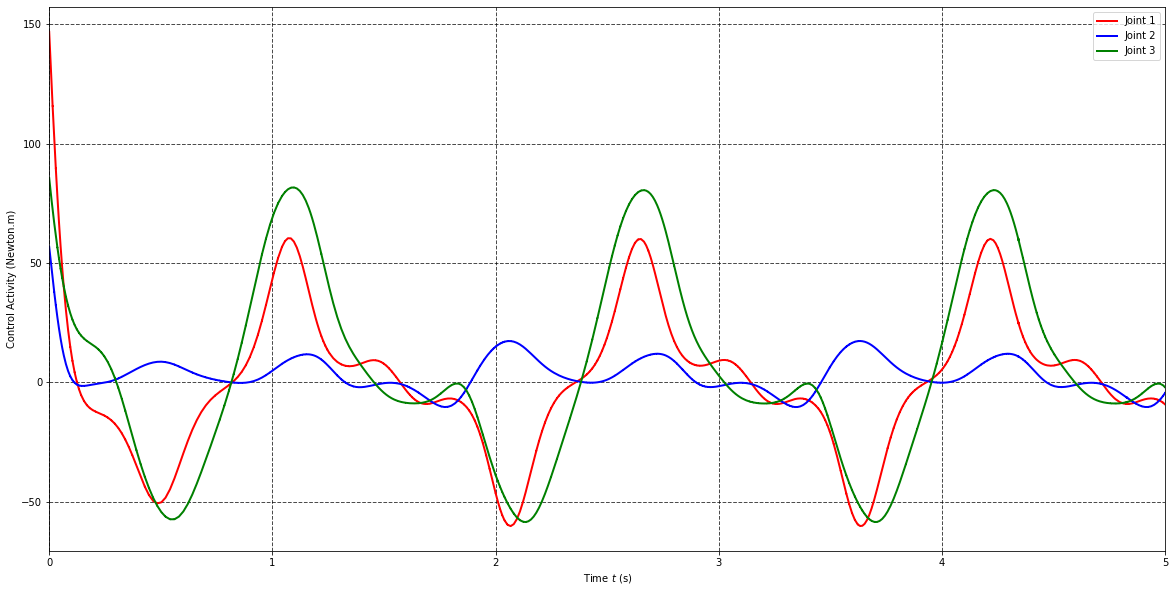

In [3]:
################################################################################################################
# 4.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv
from scipy.integrate import odeint
from matplotlib.pyplot import *
from numpy import ones

def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])


################################################################################################################
# 4.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y

################################################################################################################
# 4.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 4.1.4 Trajectory Function (Constant Trajectory)
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = 2*sin(4*t), 2*cos(4*t) , 0.3*sin(4*t)+0.3
    dq_d = 8*cos(4*t), - 8*sin(4*t) , 1.2*cos(4*t)
    ddq_d  = -32*sin(4*t),  - 32*cos(4*t) , -4.8*sin(4*t)
    return q_d, dq_d, ddq_d

################################################################################################################
# 4.1.5 Params
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81
params = l, m, J, b, g


trajectory_params  = {'q_d':[pi/3, -pi/4, 0.3]}

                     
K1 = diag([50, 50 ,50])
K2 = diag([15, 15 ,15])
gains = K1, K2

# Exact controller
control_params = trajectory_params, gains, params


################################################################################################################
# 4.1.6 PD_Controller
################################################################################################################

def control_PD(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params, gains, params_hat = control_params
    
    l, m, J, b, g = params_hat

    q_d, dq_d, ddq_d = trajectory(t, trajectory_params)
    #q_d, dq_d, ddq_d = trajectory(t, control_params[0])
    K1, K2 = gains
    v =  ddq_d + dot(K1, q_d - q) + dot(K2, dq_d - dq)

    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    u = dot(regressor(q, dq, v , l, g), p)
    control_activity.append(u)
    time_list.append(t)

    return u    


################################################################################################################
# 4.1.7 Plot
################################################################################################################

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
control_activity=[]
time_list=[]
x0=[0,0,0,0,0,0]
sol = odeint(sysode, x0, t, 
             args=(control_PD, params, control_params,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox,alpha_3_aprox = q_aprox[:,0], q_aprox[:,1],q_aprox[:,2]
alpha_1_d, alpha_2_d,alpha_3_d = trajectory(t, control_params[0])[0]
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 1)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, alpha_1_d - alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

> ## 4.2 - Aprox guesses

>> ### 4.2.1- Fixed Trajectory

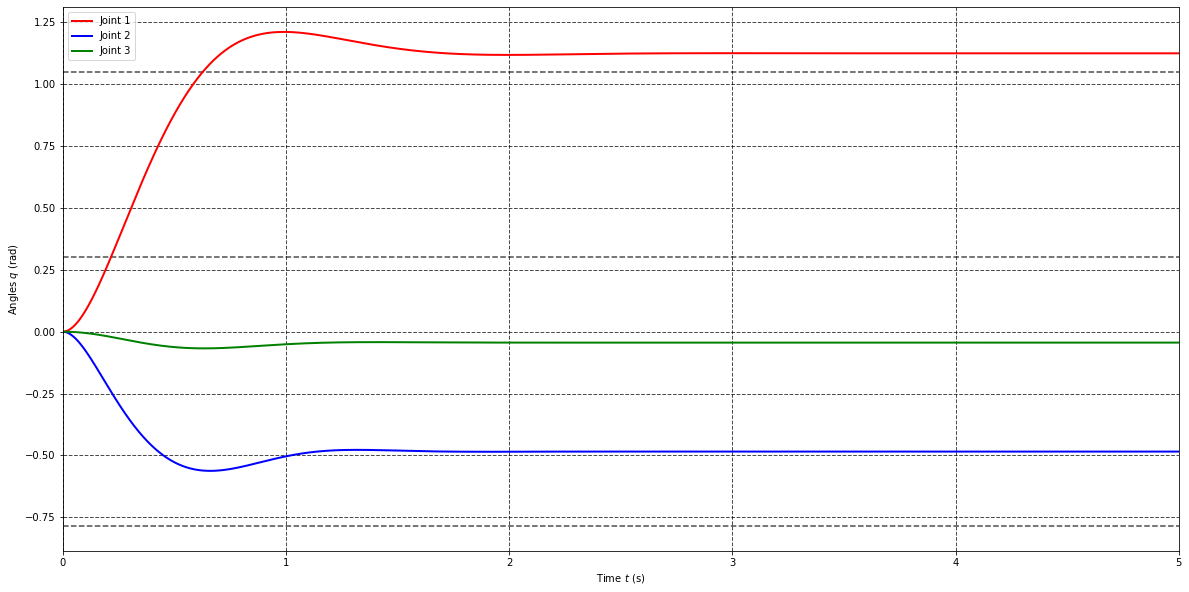

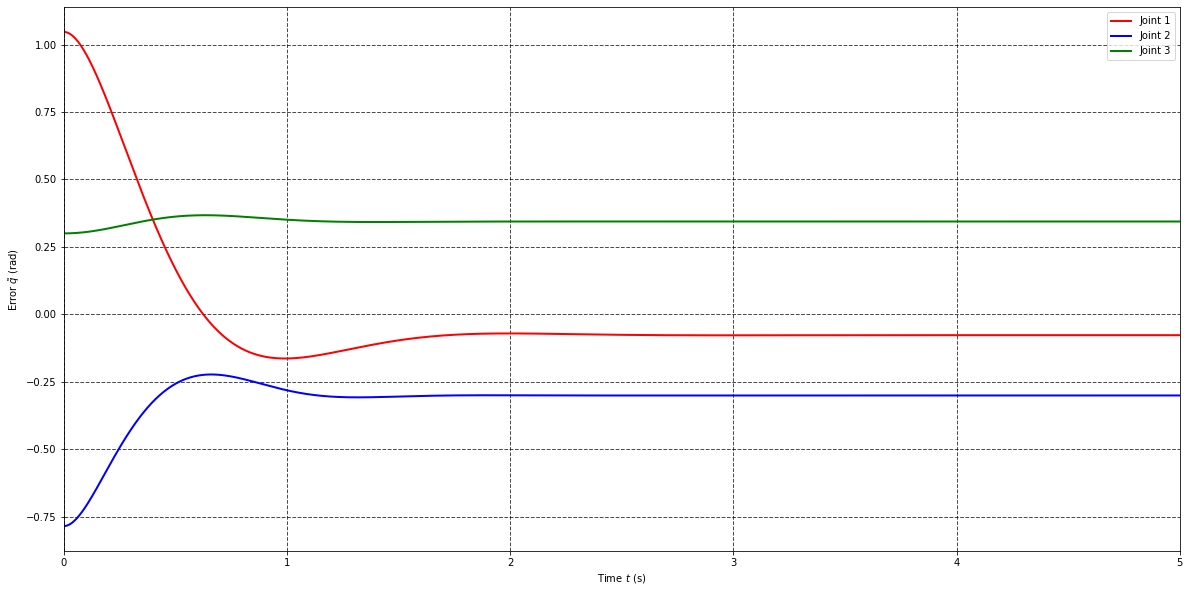

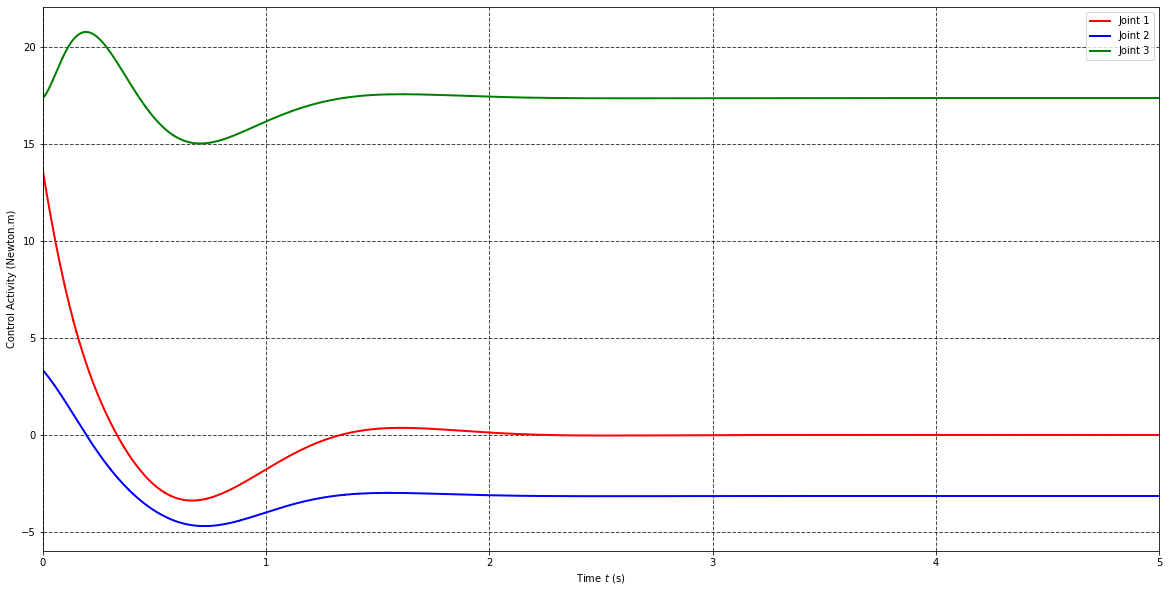

In [6]:
################################################################################################################
# 4.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv
from scipy.integrate import odeint
from matplotlib.pyplot import *
from numpy import ones

def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])


################################################################################################################
# 4.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y

################################################################################################################
# 4.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 4.1.4 Trajectory Function (Constant Trajectory)
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = trajectory_params['q_d']
    n = len(q_d)
    dq_d = zeros(n)
    ddq_d  = zeros(n)
    return q_d, dq_d, ddq_d

################################################################################################################
# 4.1.5 Params
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81

params = l, m, J, b, g

control_params = {}
control_params['params'] = params

control_params['trajectory_params']  = {'q_d':[pi/3, -pi/4, 0.3]}

                     
K1 = diag([50, 50 ,50])
K2 = diag([15, 15 ,15])
control_params['gains'] = K1, K2

m_hat= 0.8,0.8,0.7
b_hat= 0.0,0.0,0.0
params_hat = l, m_hat, J, b_hat, g

control_params['params_hat'] = params_hat


################################################################################################################
# 4.1.6 PD_Controller
################################################################################################################

def control_PD(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params = control_params['trajectory_params']
    gains = control_params['gains']
    params_hat = control_params['params_hat']
    
    l, m, J, b, g = params_hat

    q_d, dq_d, ddq_d = trajectory(t, trajectory_params)
    #q_d, dq_d, ddq_d = trajectory(t, control_params[0])
    K1, K2 = gains
    v =  ddq_d + dot(K1, q_d - q) + dot(K2, dq_d - dq)

    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    u = dot(regressor(q, dq, v , l, g), p)
    control_activity.append(u)
    time_list.append(t)

    return u    


################################################################################################################
# 4.1.7 Plot
################################################################################################################

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
control_activity=[]
time_list=[]
x0=[0,0,0,0,0,0]
sol = odeint(sysode, x0, t, 
             args=(control_PD, params, control_params,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox,alpha_3_aprox = q_aprox[:,0], q_aprox[:,1],q_aprox[:,2]
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

hlines( trajectory_params['q_d'][0],t0,tf, color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][1],t0,tf, color = 'black', linestyle = '--', alpha = 0.7)
hlines(trajectory_params['q_d'][2],t0,tf, color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, trajectory_params['q_d'][0]*ones(len(alpha_1_aprox)) - alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, trajectory_params['q_d'][1]*ones(len(alpha_2_aprox)) - alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, trajectory_params['q_d'][2]*ones(len(alpha_3_aprox)) - alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

>> ### 4.2.2- sinewave Trajectory

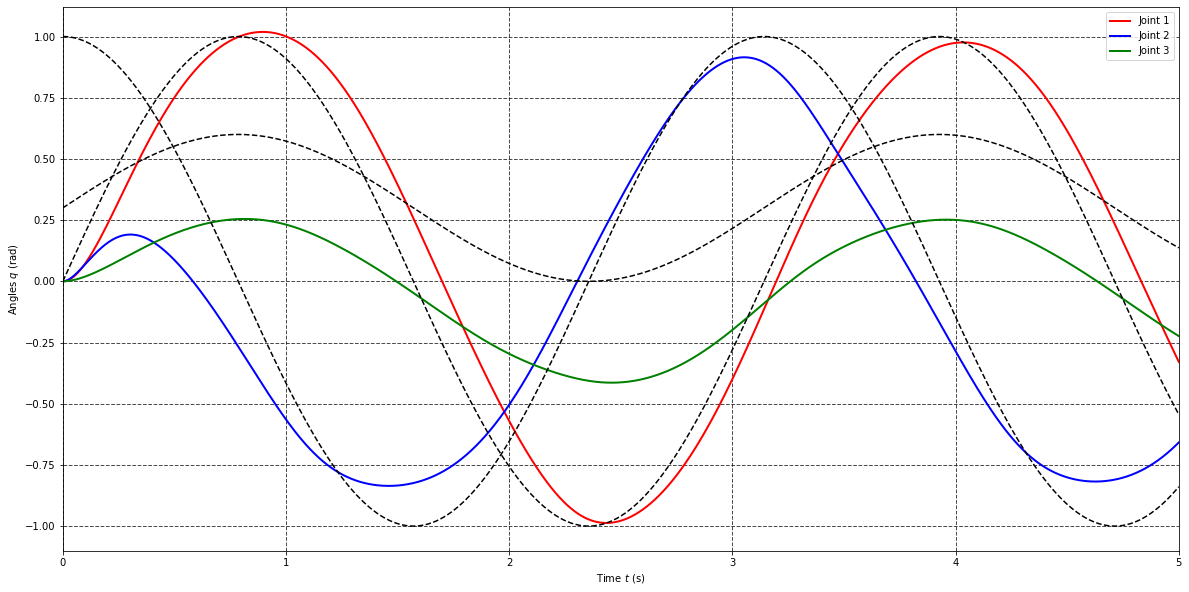

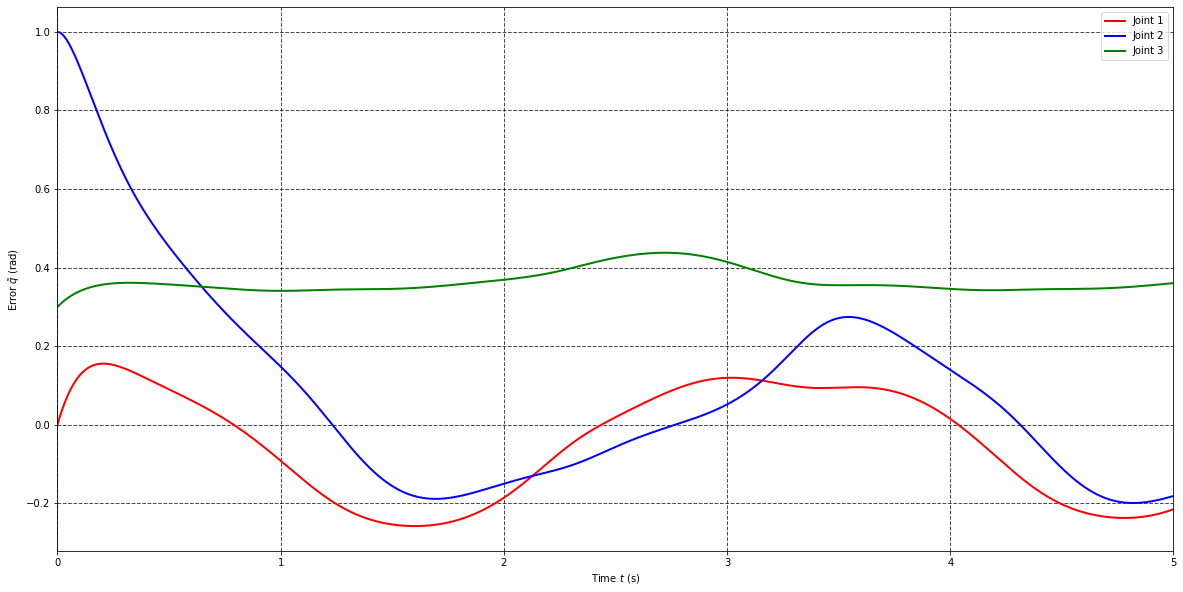

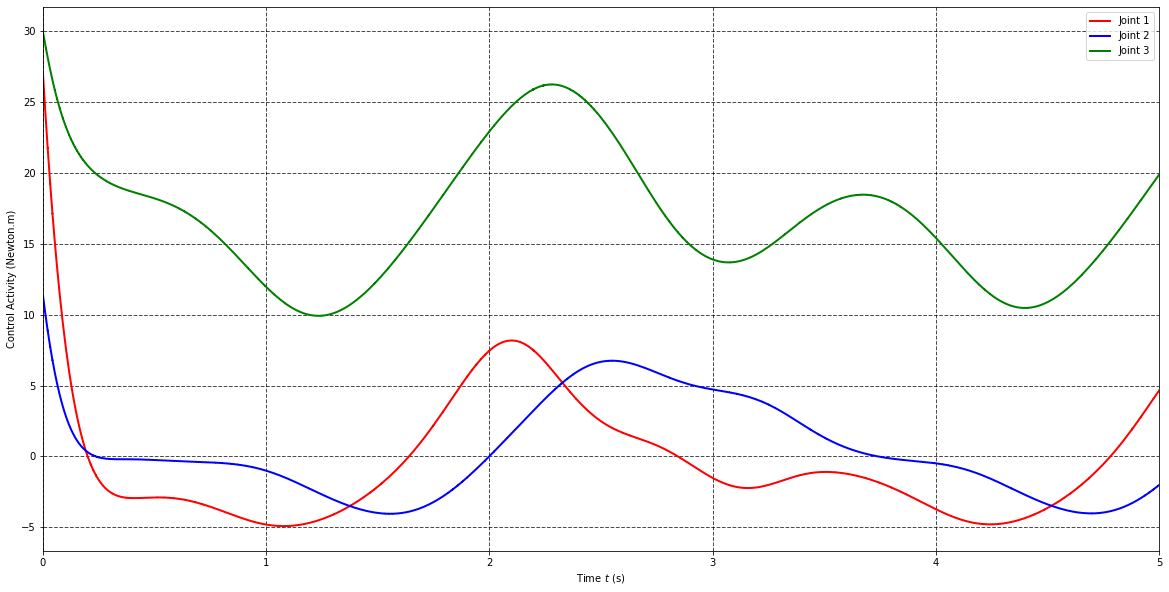

In [11]:
################################################################################################################
# 4.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv
from scipy.integrate import odeint
from matplotlib.pyplot import *
from numpy import ones

def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])


################################################################################################################
# 4.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y

################################################################################################################
# 4.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 4.1.4 Trajectory Function (Constant Trajectory)
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = 1*sin(2*t), 1*cos(2*t) , 0.3*sin(2*t)+0.3
    dq_d = 2*cos(2*t), - 2*sin(2*t) , 0.6*cos(2*t)
    ddq_d  = -4*sin(2*t),  - 4*cos(2*t) , -1.2*sin(2*t)
    return q_d, dq_d, ddq_d

################################################################################################################
# 4.1.5 Params
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81

params = l, m, J, b, g

control_params = {}
control_params['params'] = params

control_params['trajectory_params']  = {'q_d':[pi/3, -pi/4, 0.3]}

factor1=1
factor2=2        
K1 = diag([50*factor1, 50*factor1 ,50*factor1])
K2 = diag([15*factor2, 15*factor2 ,15*factor2])
control_params['gains'] = K1, K2

m_hat= 0.8,0.8,0.7
b_hat= 0.0,0.0,0.0
params_hat = l, m_hat, J, b_hat, g

control_params['params_hat'] = params_hat


################################################################################################################
# 4.1.6 PD_Controller
################################################################################################################

def control_PD(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params = control_params['trajectory_params']
    gains = control_params['gains']
    params_hat = control_params['params_hat']
    
    l, m, J, b, g = params_hat

    q_d, dq_d, ddq_d = trajectory(t, trajectory_params)
    #q_d, dq_d, ddq_d = trajectory(t, control_params[0])
    K1, K2 = gains
    v =  ddq_d + dot(K1, q_d - q) + dot(K2, dq_d - dq)

    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    u = dot(regressor(q, dq, v , l, g), p)
    control_activity.append(u)
    time_list.append(t)

    return u    


################################################################################################################
# 4.1.7 Plot
################################################################################################################

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
control_activity=[]
time_list=[]
x0=[0,0,0,0,0,0]
sol = odeint(sysode, x0, t, 
             args=(control_PD, params, control_params,)) # Integrate system
q_aprox, dq_aprox = sol[:,:3], sol[:,3:6]
alpha_1_aprox, alpha_2_aprox,alpha_3_aprox = q_aprox[:,0], q_aprox[:,1],q_aprox[:,2]
alpha_1_d, alpha_2_d,alpha_3_d = trajectory(t, control_params['trajectory_params'])[0]
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 1)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, alpha_1_d - alpha_1_aprox,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_aprox,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_aprox,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

# 5- Passivty Control

> ## 5.1 - Perfect guesses

>> ### 5.1.1- Fixed Trajectory

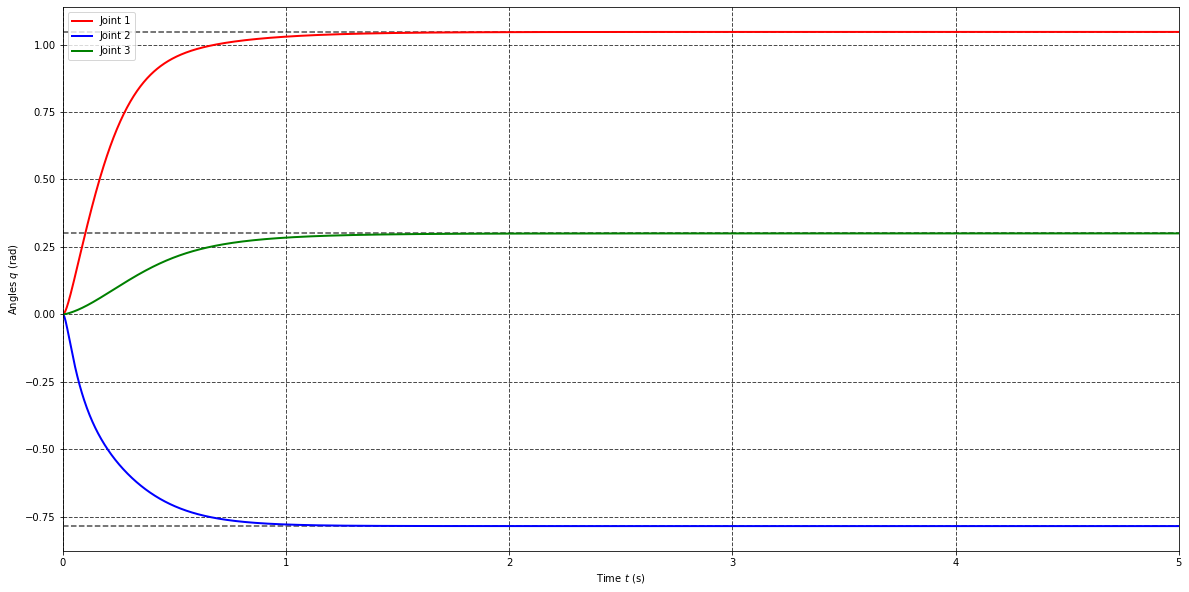

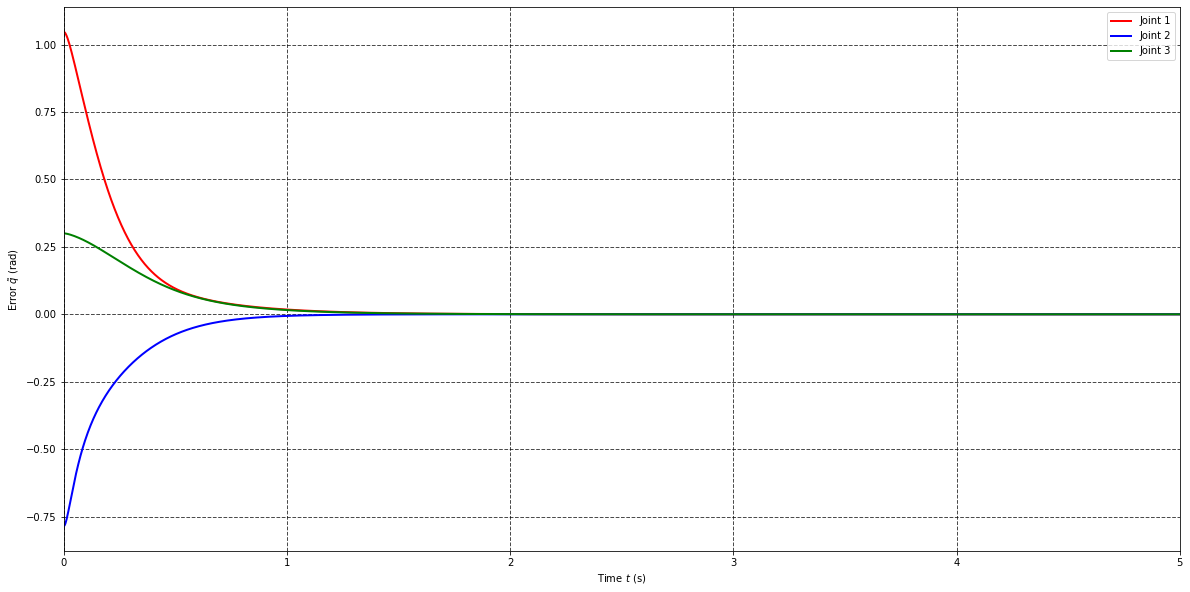

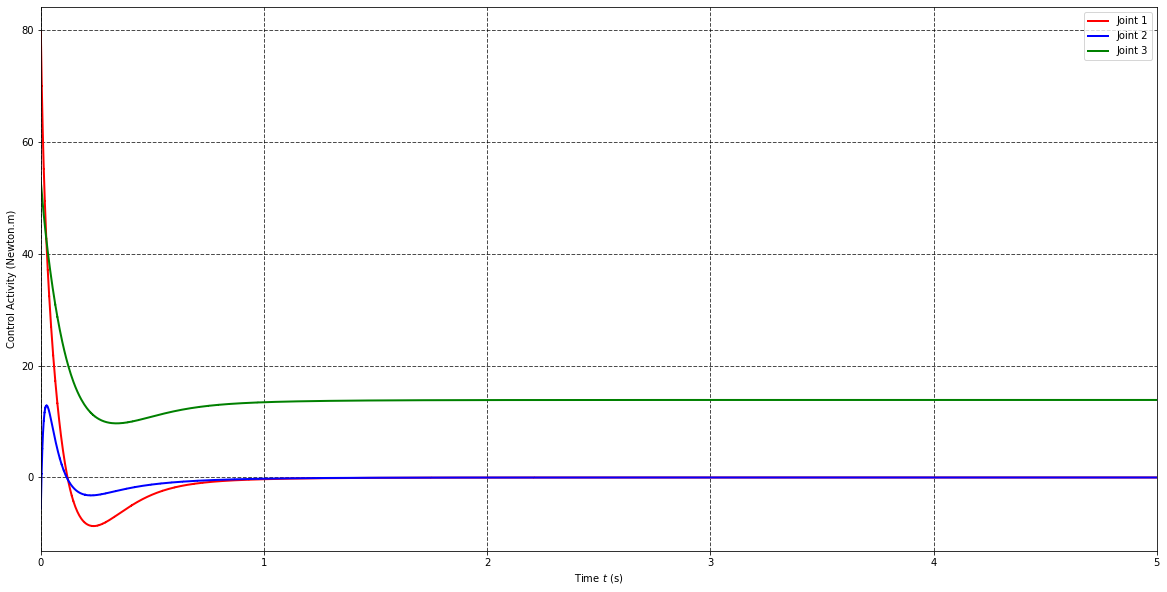

In [13]:
################################################################################################################
# 5.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv


def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])

################################################################################################################
# 5.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y


################################################################################################################
# 5.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 5.1.4 Trajectory Function
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = trajectory_params['q_d']
    n = len(q_d)
    dq_d = zeros(n)
    ddq_d  = zeros(n)
    return q_d, dq_d, ddq_d

################################################################################################################
# 5.1.5 Passivty Control function
################################################################################################################
control_activity=[]
time_list=[]
def control(x, t, control_params):
    q, dq = x[:3], x[3:6]
    trajectory_params, gains, params_hat = control_params
    
    l, m, J, b, g = control_params['params']

    q_d, dq_d, ddq_d = trajectory(t, control_params['trajectory_params'])
    
    Lambda, K = control_params['gains']

    e, de = q_d - q, dq_d - dq
    
    # Change of variables
    q_star = de + dot(Lambda,e)
    dq_s = dq_d + dot(Lambda,e)
    ddq_s = ddq_d + dot(Lambda,de)
    # parameters
    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    # Controller
    u = dot(regressor(q, dq_s, ddq_s , l, g), p) + dot(K, q_star)
    control_activity.append(u)
    time_list.append(t)

    return u    

################################################################################################################
# 5.1.6 Manipulator
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81

params = l, m, J, b, g

control_params = {}
control_params['params'] = params

control_params['trajectory_params'] = {'q_d':[pi/3, -pi/4,0.3]}

Lambda = diag([7, 5, 10])
K = diag([7, 5 ,8])
control_params['gains'] = Lambda, K



################################################################################################################
# 5.1.7 Plot
################################################################################################################
from scipy.integrate import odeint

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0,0,0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct , alpha_3_exct= q_exct[:,0], q_exct[:,1] ,q_exct[:,2]

from matplotlib.pyplot import *

rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

hlines(control_params['trajectory_params']['q_d'][0], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][1], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][2], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, trajectory_params['q_d'][0]*ones(len(alpha_1_exct)) - alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, trajectory_params['q_d'][1]*ones(len(alpha_2_exct)) - alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, trajectory_params['q_d'][2]*ones(len(alpha_3_exct)) - alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

>> ### 5.1.2- SineWave Trajectory

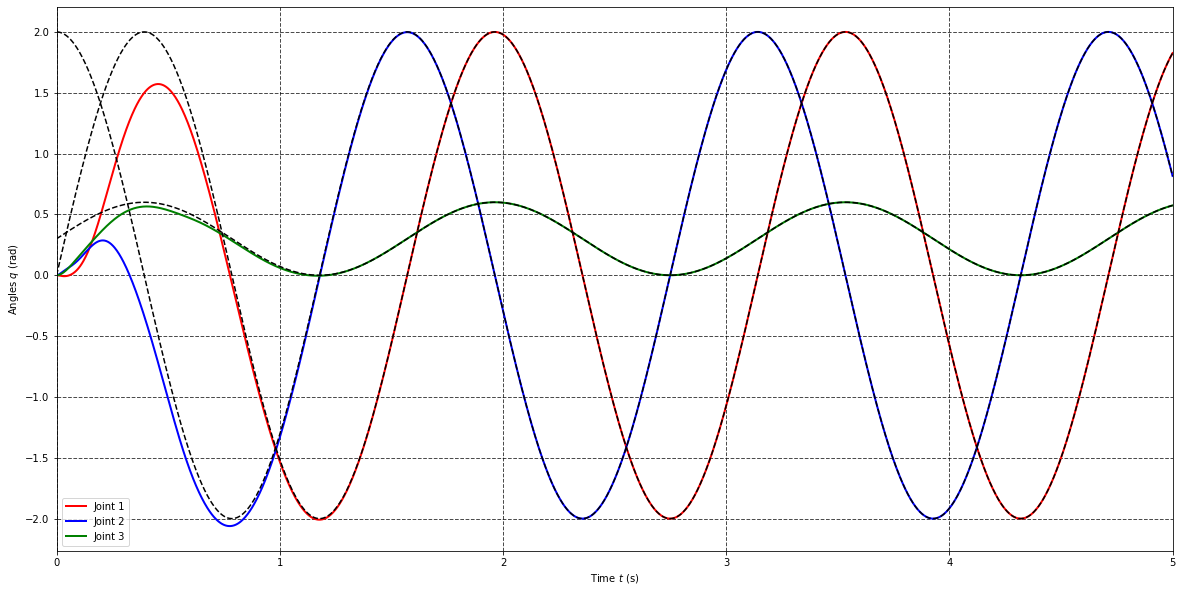

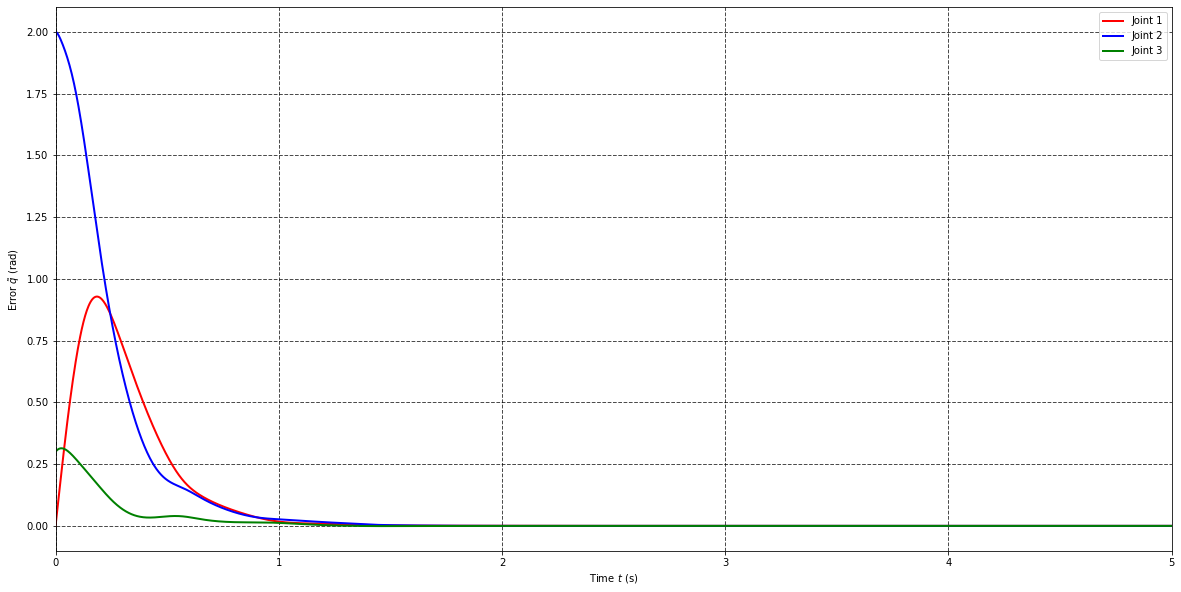

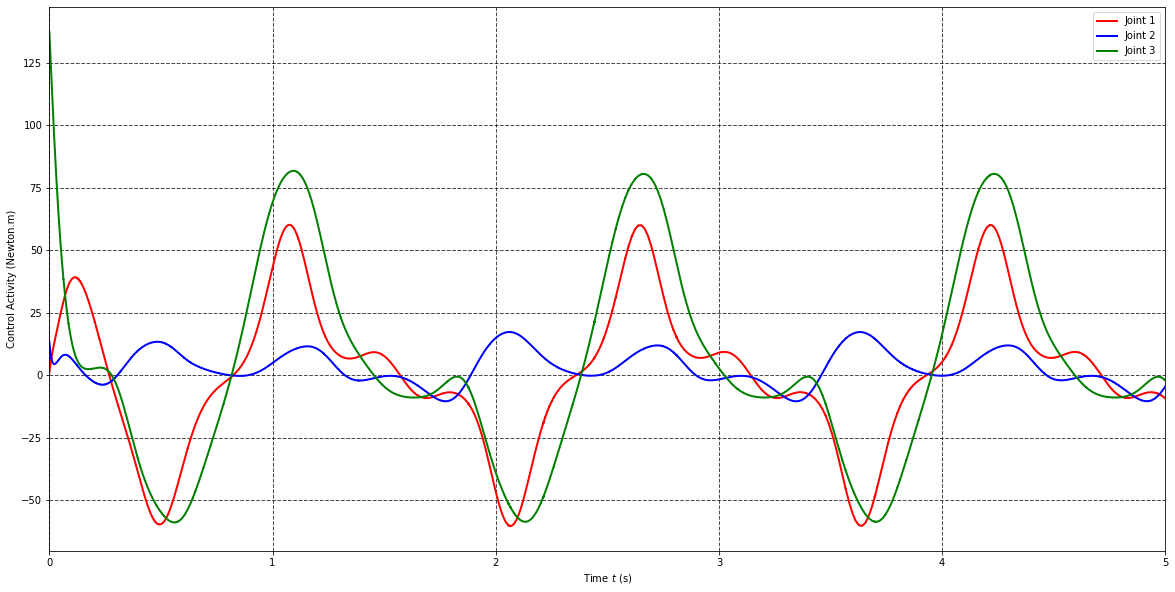

In [16]:
def trajectory(t, trajectory_params):
    q_d  = 2*sin(4*t), 2*cos(4*t) , 0.3*sin(4*t)+0.3
    dq_d = 8*cos(4*t), - 8*sin(4*t) , 1.2*cos(4*t)
    ddq_d  = -32*sin(4*t),  - 32*cos(4*t) , -4.8*sin(4*t)
    return q_d, dq_d, ddq_d

from scipy.integrate import odeint
control_activity=[]
time_list=[]
# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0,0,0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct , alpha_3_exct= q_exct[:,0], q_exct[:,1] ,q_exct[:,2]
alpha_1_d, alpha_2_d,alpha_3_d = trajectory(t, control_params['trajectory_params'])[0]

from matplotlib.pyplot import *
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 1)

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, alpha_1_d - alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

> ## 5.2 - Aprox guesses

>> ### 5.2.1- Fixed Trajectory

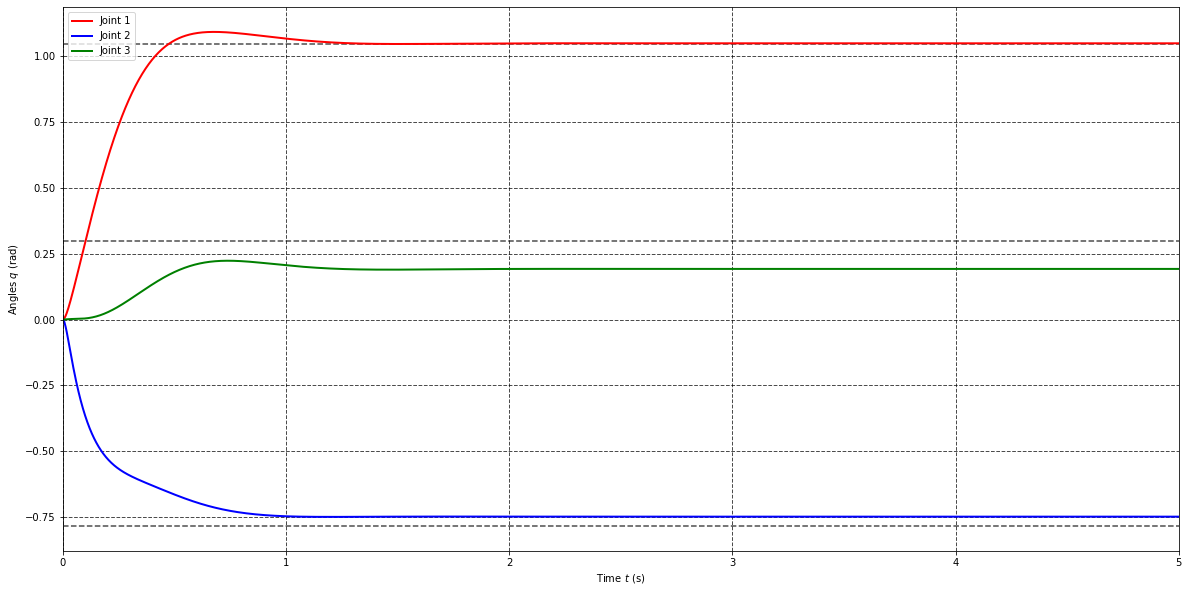

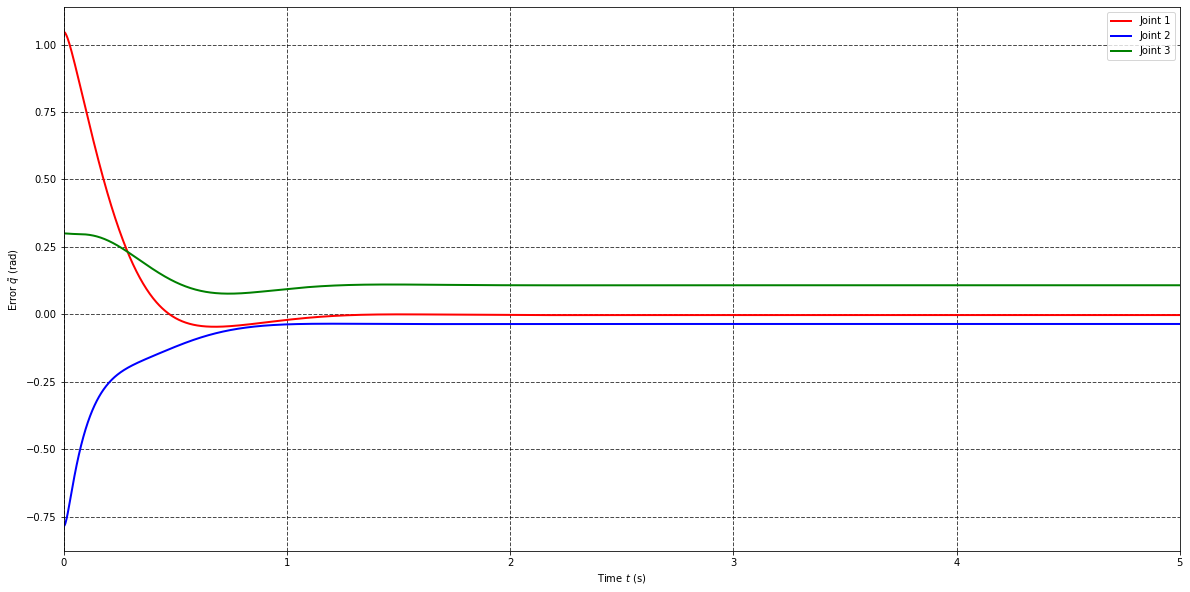

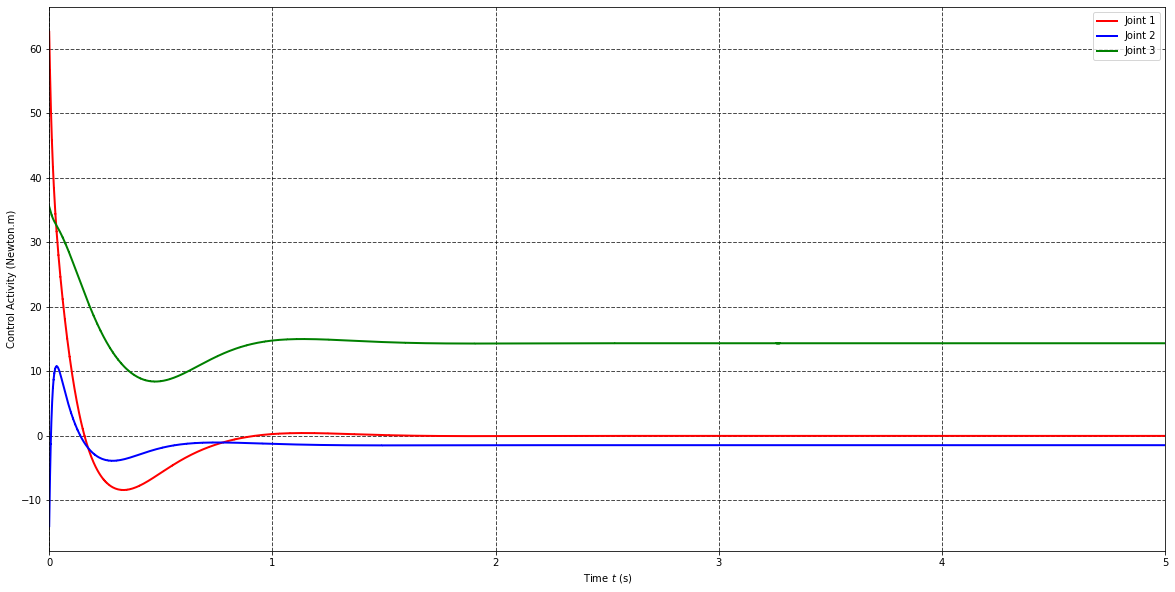

In [18]:
################################################################################################################
# 5.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv


def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])

################################################################################################################
# 5.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y


################################################################################################################
# 5.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 5.1.4 Trajectory Function
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = trajectory_params['q_d']
    n = len(q_d)
    dq_d = zeros(n)
    ddq_d  = zeros(n)
    return q_d, dq_d, ddq_d

################################################################################################################
# 5.1.5 Passivty Control function
################################################################################################################
control_activity=[]
time_list=[]
def control(x, t, control_params):
    q, dq = x[:3], x[3:6]
    #trajectory_params, gains, params_hat = control_params
    
    l, m, J, b, g = control_params['params_hat']

    q_d, dq_d, ddq_d = trajectory(t, control_params['trajectory_params'])
    
    Lambda, K = control_params['gains']

    e, de = q_d - q, dq_d - dq
    
    # Change of variables
    q_star = de + dot(Lambda,e)
    dq_s = dq_d + dot(Lambda,e)
    ddq_s = ddq_d + dot(Lambda,de)
    # parameters
    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    # Controller
    u = dot(regressor(q, dq_s, ddq_s , l, g), p) + dot(K, q_star)
    control_activity.append(u)
    time_list.append(t)

    return u    

################################################################################################################
# 5.1.6 Manipulator
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81

params = l, m, J, b, g

control_params = {}
control_params['params'] = params
m_hat= 1.2,0.8,0.8
b_hat=0.0,0.0,0.0
control_params['params_hat']=l,m_hat, J ,b_hat,g

control_params['trajectory_params'] = {'q_d':[pi/3, -pi/4,0.3]}

Lambda = diag([7, 5, 10])
K = diag([7, 5 ,8])
control_params['gains'] = Lambda, K



################################################################################################################
# 5.1.7 Plot
################################################################################################################
from scipy.integrate import odeint

# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0,0,0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct , alpha_3_exct= q_exct[:,0], q_exct[:,1] ,q_exct[:,2]

from matplotlib.pyplot import *

rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

hlines(control_params['trajectory_params']['q_d'][0], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][1], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
hlines(control_params['trajectory_params']['q_d'][2], t0, tf,color = 'black', linestyle = '--', alpha = 0.7)
grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()


plot(t, trajectory_params['q_d'][0]*ones(len(alpha_1_exct)) - alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, trajectory_params['q_d'][1]*ones(len(alpha_2_exct)) - alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, trajectory_params['q_d'][2]*ones(len(alpha_3_exct)) - alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

>> ### 5.2.2- SineWave Trajectory

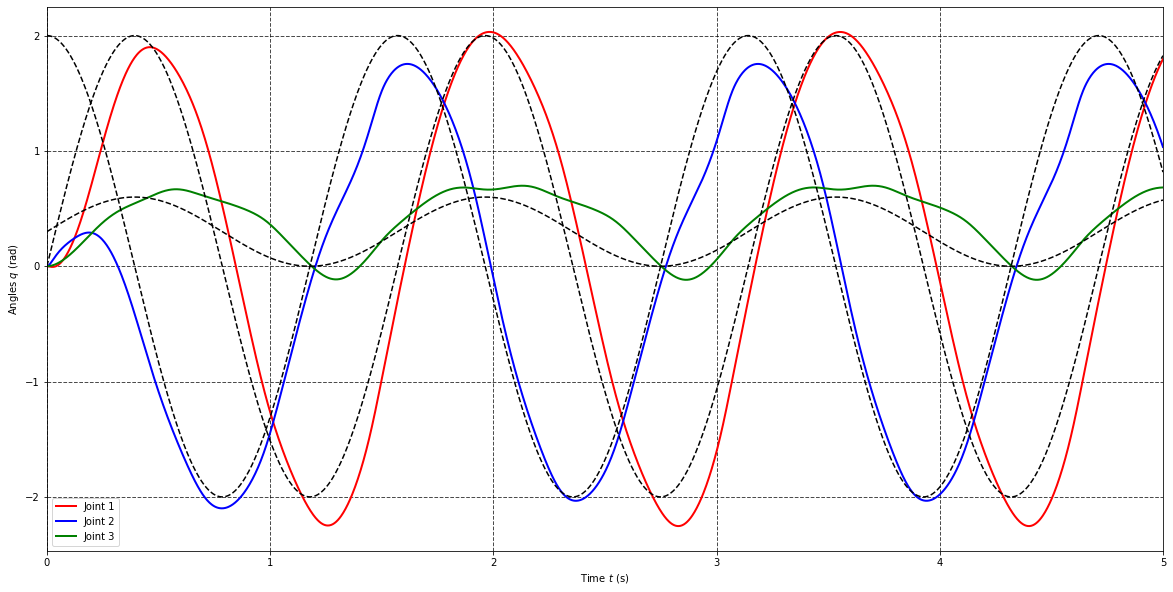

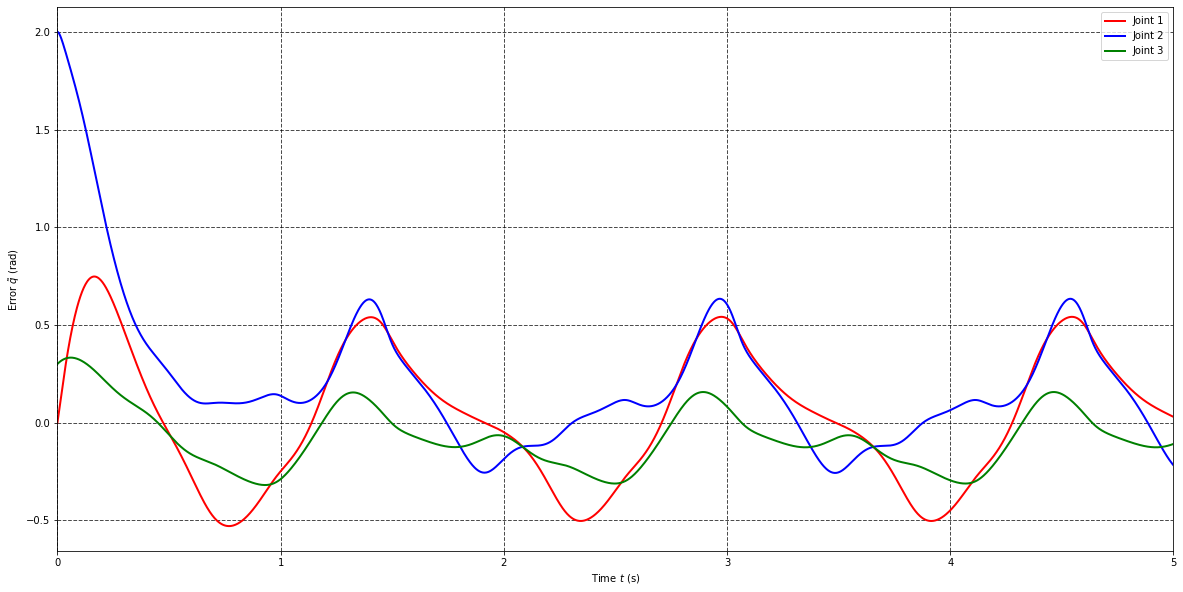

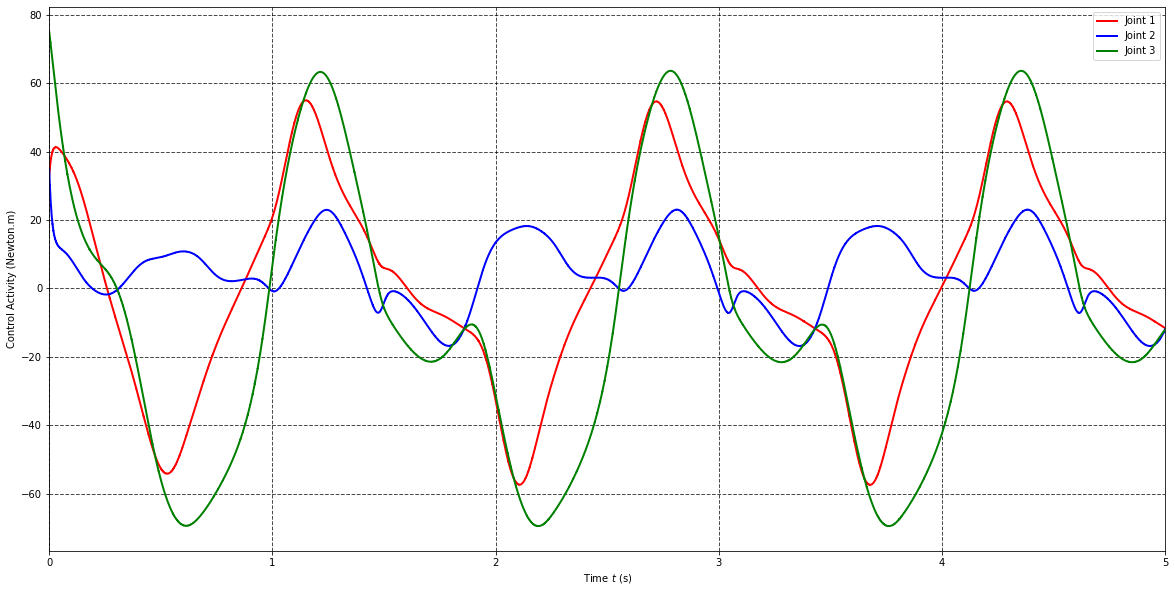

In [19]:
def trajectory(t, trajectory_params):
    q_d  = 2*sin(4*t), 2*cos(4*t) , 0.3*sin(4*t)+0.3
    dq_d = 8*cos(4*t), - 8*sin(4*t) , 1.2*cos(4*t)
    ddq_d  = -32*sin(4*t),  - 32*cos(4*t) , -4.8*sin(4*t)
    return q_d, dq_d, ddq_d

from scipy.integrate import odeint
control_activity=[]
time_list=[]
# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0,0,0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct , alpha_3_exct= q_exct[:,0], q_exct[:,1] ,q_exct[:,2]
alpha_1_d, alpha_2_d,alpha_3_d = trajectory(t, control_params['trajectory_params'])[0]

from matplotlib.pyplot import *
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 1)

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, alpha_1_d - alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

# 6- Passivty Robust Control

> ## 6.1 - Aprox guesses without weight

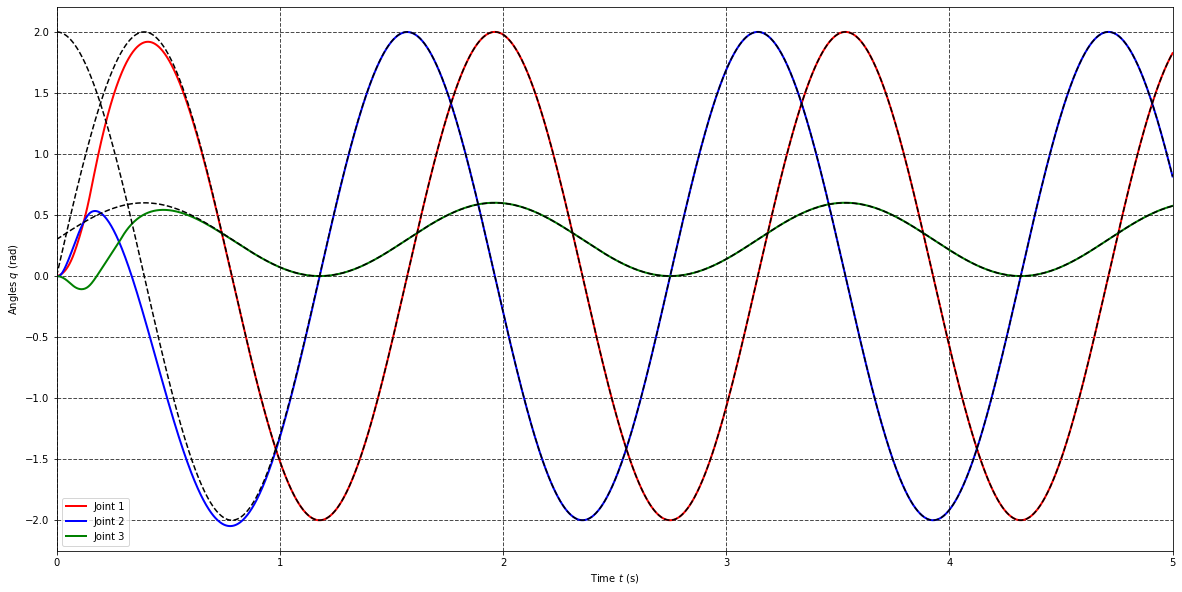

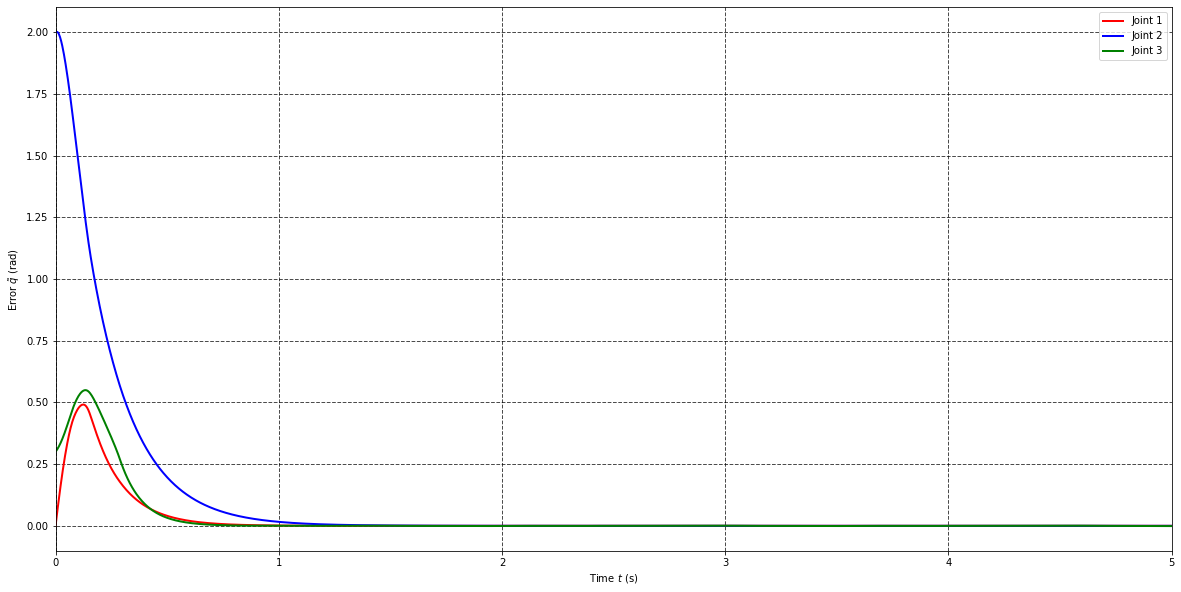

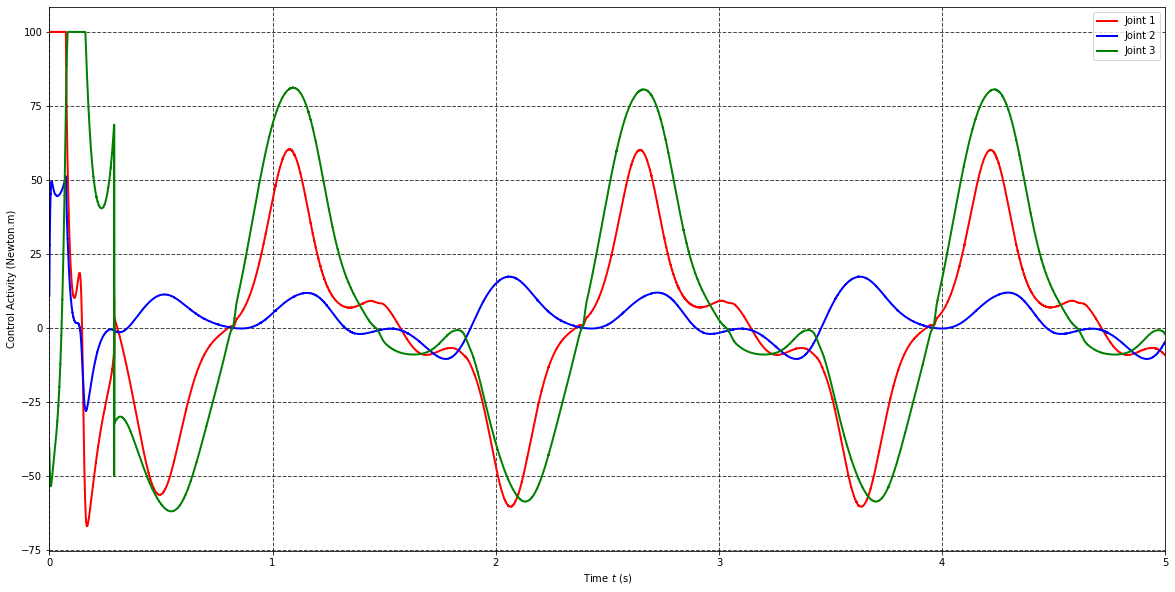

In [22]:
################################################################################################################
# 5.1.1 system dynamics function
################################################################################################################

from numpy import pi, linspace, array, dot, sin, cos, diag, concatenate, zeros
from numpy.linalg import inv


def D(q, params):
    #alpha_1, alpha_2, alpha_3 = q
    q1, q2, q3 = q
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]


    d11=I1 + I2 + I3 + (L2**2*m2)/4 + L2**2*m3 + (L3**2*m3)/8 + (m3*q3**2)/2 - (L3*m3*q3)/2 - (L3**2*m3*cos(2*q2))/8 - (m3*q3**2*cos(2*q2))/2 + (L3*m3*q3*cos(2*q2))/2
    d12=(L2*m3*cos(q2)*(L3 - 2*q3))/2
    d13=-L2*m3*sin(q2)
    d21=d12
    d22=(m3*L3**2)/4 - m3*L3*q3 + m3*q3**2 + I2 + I3
    d23=0
    d31=d13
    d32=d23
    d33=m3

    return array([[d11,d12,d13],[d21,d22,d23],[d31,d32,d33]])
    
def h(q, dq, params):
    q1, q2, q3 = q
    dq1, dq2,dq3 = dq
    
    l, m, J, b, g = params
    I1=J[0]
    I2=J[1]
    I3=J[2]

    m1=m[0]
    m2=m[1]
    m3=m[2]
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    b1=b[0]
    b2=b[1]
    b3=b[2]

    g1=0
    g2=g*m3*sin(q2)*(L3/2 - q3)
    g3=g*m3*cos(q2)

    c1= -dq2*(L2*dq3*m3*cos(q2) - dq1*((m3*sin(2*q2)*L3**2)/8 - (m3*sin(2*q2)*L3*q3)/2 + (m3*sin(2*q2)*q3**2)/2) + (L2*dq2*m3*sin(q2)*(L3 - 2*q3))/2) - (dq3*m3*(L3*dq1 - 2*dq1*q3 - L3*dq1*cos(q2)**2 + 2*dq1*q3*cos(q2)**2 + 2*L2*dq2*cos(q2)))/2 - (dq1*m3*(L3 - 2*q3)*(2*dq3 - 2*dq3*cos(2*q2) - L3*dq2*sin(2*q2) + 2*dq2*q3*sin(2*q2)))/8
    c2= -dq2*dq3*m3*(L3 - 2*q3) - (dq1**2*m3*sin(2*q2)*(L3 - 2*q3)**2)/8
    c3= (m3*(L3 - 2*q3)*dq2**2)/2 - (dq1**2*m3*(L3 - 2*q3)*(cos(2*q2) - 1))/4

    h1 = c1 + g1 + b1*dq1
    h2 = c2 + g2 + b2*dq2
    h3 = c3 + g3 + b3*dq3

    return array([h1, h2 , h3])

################################################################################################################
# 5.1.2 regressor function
################################################################################################################
def regressor(q, dq, ddq, l, g):

    q1, q2,q3 = q
    dq1, dq2,dq3 = dq
    ddq1, ddq2,ddq3 = ddq

    
    
    L1=l[0]
    L2=l[1]
    L3=l[2]
    
    Y = zeros((3,9))

    term1= ddq1*q3**2/2+L2**2*ddq1+L3**2*ddq1/8+dq1*dq3*q3-L3**2*ddq1*cos(2*q2)/8-ddq1*q3**2*cos(2*q2)/2-L2*ddq3*sin(q2) \
        -L3*dq1*dq3/2-L3*ddq1*q3/2-L2*L3*dq2**2*sin(q2)/2+L3*dq1*dq3*cos(2*q2)/2+L3*ddq1*q3*cos(2*q2)/2 \
        +L2*dq2**2*q3*sin(q2)-dq1*dq3*q3*cos(2*q2)+L3**2*dq1*dq2*sin(2*q2)/4 \
        +L2*L3*ddq2*cos(q2)/2+dq1*dq2*q3**2*sin(2*q2)-2*L2*dq2*dq3*cos(q2) \
        -L2*ddq2*q3*cos(q2)-L3*dq1*dq2*q3*sin(2*q2)

    term2= L3**2*ddq2/4-L3*q3*ddq2+q3**2*ddq2-dq2*dq3*(L3-2*q3)+g*sin(q2)*(L3/2-q3) \
          -dq1**2*cos(q2)*sin(q2)*(L3-2*q3)**2/4+L2*ddq1*cos(q2)*(L3-2*q3)/2

    term3= (L3-2*q3)*dq2**2/2+ddq3+g*cos(q2)-L2*ddq1*sin(q2) \
        - (dq1**2*(L3-2*q3)*(2*cos(q2)**2-2))/4
    

    # Joint 1
    Y[0,0] = 0
    Y[0,1] = ddq1
    Y[0,2] = dq1
    Y[0,3] = L2**2*ddq1/4
    Y[0,4] = ddq1
    Y[0,5] = 0
    Y[0,6] = term1
    Y[0,7] = ddq1
    Y[0,8] = 0
    
    # Joint 2
    Y[1,0] = 0
    Y[1,1] = 0
    Y[1,2] = 0
    Y[1,3] = 0
    Y[1,4] = ddq2
    Y[1,5] = dq2
    Y[1,6] = term2
    Y[1,7] = ddq2
    Y[1,8] = 0
    
    #joint 3
    Y[2,0] = 0
    Y[2,1] = 0
    Y[2,2] = 0
    Y[2,3] = 0
    Y[2,4] = 0
    Y[2,5] = 0
    Y[2,6] = term3
    Y[2,7] = 0
    Y[2,8] = dq3
    
    return Y


################################################################################################################
# 5.1.3 sysode
################################################################################################################
def sysode(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    ddq = dot(inv(Dm), u - hm )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

################################################################################################################
# 5.1.4 Trajectory Function
################################################################################################################
def trajectory(t, trajectory_params):
    q_d  = 2*sin(4*t), 2*cos(4*t) , 0.3*sin(4*t)+0.3
    dq_d = 8*cos(4*t), - 8*sin(4*t) , 1.2*cos(4*t)
    ddq_d  = -32*sin(4*t),  - 32*cos(4*t) , -4.8*sin(4*t)
    return q_d, dq_d, ddq_d

################################################################################################################
# 5.1.5 Passivty Control function
################################################################################################################
from numpy.linalg import norm


control_activity=[]
time_list=[]

def robust_control(x, t, control_params):
    q, dq = x[:3], x[3:6]
    
    l, m, J, b, g = control_params['params_hat']

    q_d, dq_d, ddq_d = trajectory(t, control_params['trajectory_params'])
    
    Lambda, K = control_params['gains']
    # change of variables
    e, de = q_d - q, dq_d - dq
    q_star = de + dot(Lambda,e)
    dq_s = dq_d + dot(Lambda,e)
    ddq_s = ddq_d + dot(Lambda,de)
    
    Y = regressor(q, dq_s, ddq_s , l, g)
    Y_dot_q = dot(Y.T, q_star)
    eps = control_params['eps']
    rho = control_params['rho']
    
    if norm(Y_dot_q)>eps:
      delta_p = rho*Y_dot_q/norm(Y_dot_q)
    else:
      delta_p = rho*Y_dot_q/eps

    p = [m[0], J[0], b[0], m[1], J[1], b[1],m[2],J[2],b[2] ] 
    u = dot(Y, p+delta_p) + dot(K, q_star)

    limit=100
    if u[0]>limit:
      u[0]=limit
    elif u[0]<-limit:
      u[0]=-limit

    if u[1]>limit:
      u[1]=limit
    elif u[1]<-limit:
      u[1]=-limit

    if u[2]>limit:
      u[2]=limit
    elif u[2]<-limit:
      u[2]=-limit
    control_activity.append(u)
    time_list.append(t)

    return u  

################################################################################################################
# 5.1.6 Manipulator
################################################################################################################
# Manipulator parameters
l = 1, 0.6, 0.6
m = 4.0, 3.0 , 2.0
J = 0.01, 0.01,0.01
b = 0.02, 0.02 ,0.02
g = 9.81

params = l, m, J, b, g

control_params = {}
control_params['params'] = params

control_params['trajectory_params'] = {'q_d':[pi/3, -pi/4,0.3]}

Lambda = diag([7, 5, 10])
K = diag([7, 5 ,8])
control_params['gains'] = Lambda, K

control_params['eps'] = 0.1
control_params['rho'] = 5

m_hat= 1.2,0.8,0.8
b_hat=0.0,0.0,0.0
control_params['params_hat']=l,m_hat, J ,b_hat,g
################################################################################################################
# 5.1.7 Plot
################################################################################################################
from scipy.integrate import odeint
control_activity=[]
time_list=[]
# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0,0,0] # Set initial state 
sol = odeint(sysode, x0, t, 
             args=(robust_control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct , alpha_3_exct= q_exct[:,0], q_exct[:,1] ,q_exct[:,2]
alpha_1_d, alpha_2_d,alpha_3_d = trajectory(t, control_params['trajectory_params'])[0]

from matplotlib.pyplot import *
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 1)

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, alpha_1_d - alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

> ## 6.2 - Aprox guesses with weight

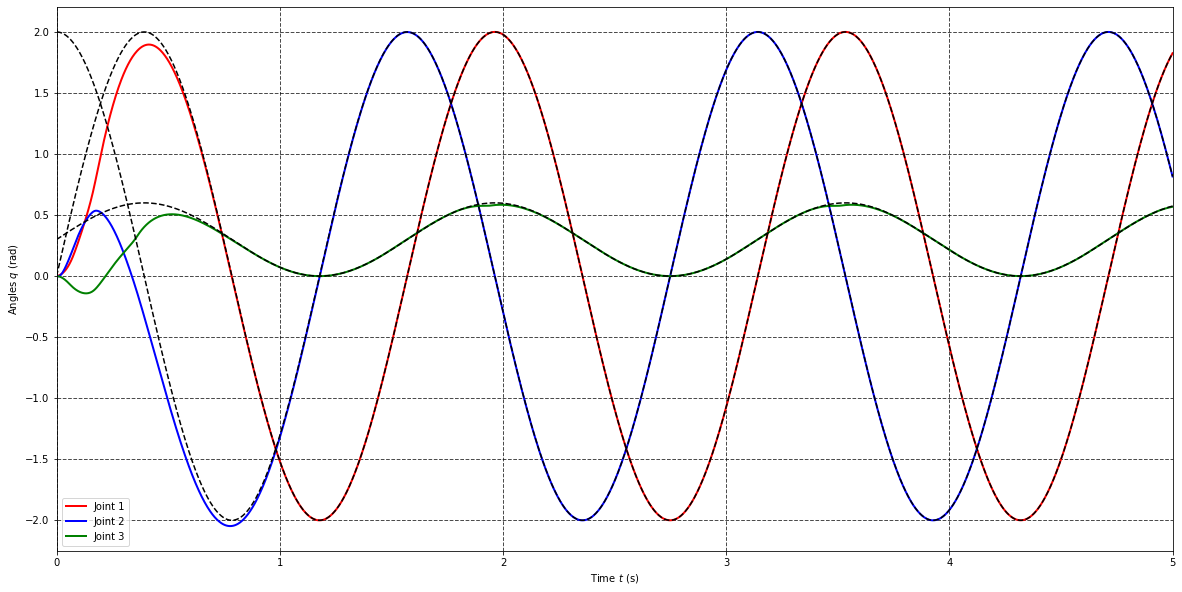

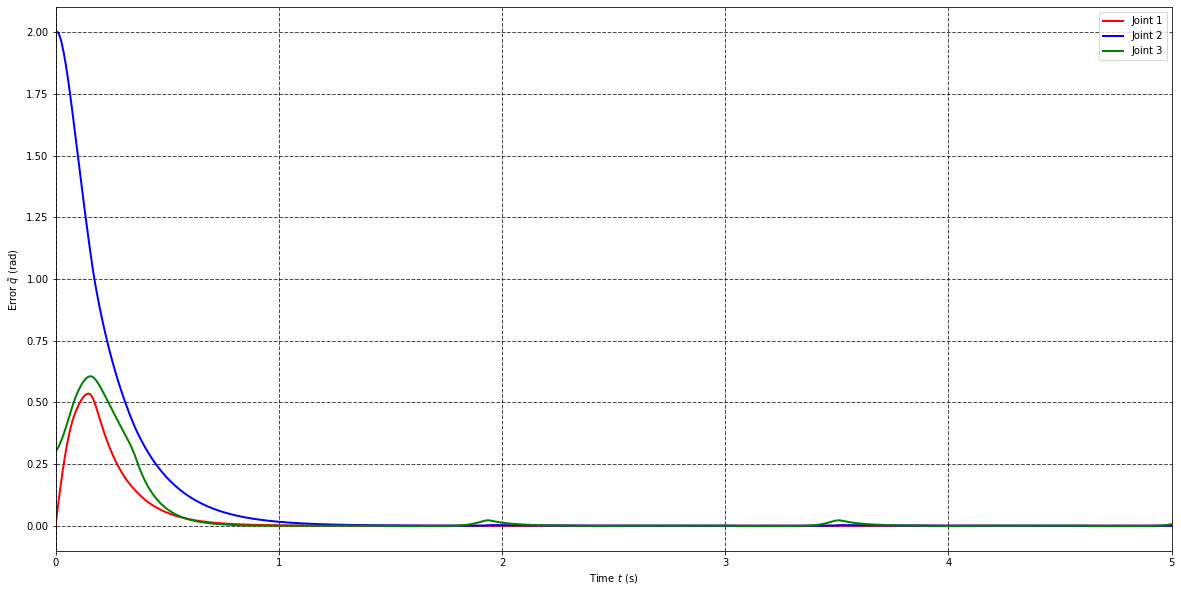

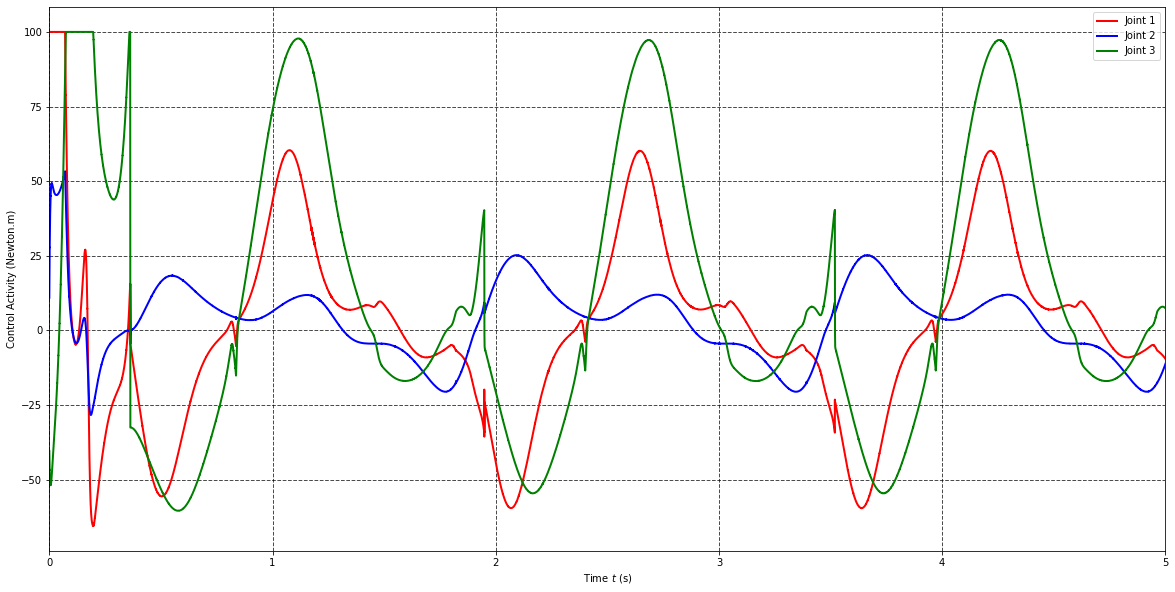

In [23]:
# jacobian function
Fx=0
Fy=0
Fz=20

F=array([Fx,Fy,Fz])

def jac_fn(q):
  q1,q2,q3 = q

  L1,L2,L3= l

  j11= q3*cos(q1)*sin(q2) - L2*sin(q1)
  j12= q3*cos(q2)*sin(q1)
  j13= sin(q1)*sin(q2)

  j21= L2*cos(q1) + q3*sin(q1)*sin(q2)
  j22= -q3*cos(q1)*cos(q2)
  j23= -cos(q1)*sin(q2)

  j31= 0
  j32= -q3*sin(q2)
  j33=   cos(q2)

  return array([[j11,j12,j13],[j21,j22,j23],[j31,j32,j33]])

def sysode_force(x, t, control, params, control_params):
    q, dq = x[:3], x[3:6]

    # Calculate control
    u = control(x, t, control_params) 

    Dm = D(q, params)
    hm = h(q, dq, params)
    jac_T = jac_fn(q).T
    Torque= jac_T.dot(F)
    ddq = dot(inv(Dm), u - hm - Torque )

    dx1 = dq
    dx2 = ddq
    dx = dx1, dx2

    return concatenate(dx)

from scipy.integrate import odeint
control_activity=[]
time_list=[]
# Integration
t0 = 0 # Initial time 
tf = 5 # Final time
N = 2E3 # Numbers of points in time span
t = linspace(t0, tf, int(N)) # Create time span
x0 = [0, 0, 0, 0,0,0] # Set initial state 
sol = odeint(sysode_force, x0, t, 
             args=(robust_control, params, control_params,)) # Integrate system
q_exct, dq_exct = sol[:,:3], sol[:,3:6]
alpha_1_exct, alpha_2_exct , alpha_3_exct= q_exct[:,0], q_exct[:,1] ,q_exct[:,2]
alpha_1_d, alpha_2_d,alpha_3_d = trajectory(t, control_params['trajectory_params'])[0]

from matplotlib.pyplot import *
rcParams["figure.figsize"] = 20, 10
plot(t, alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

plot(t, alpha_1_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_2_d, color = 'black', linestyle = '--', alpha = 1)
plot(t,alpha_3_d, color = 'black', linestyle = '--', alpha = 1)

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Angles $q$ (rad)')
xlabel(r'Time $t$ (s)')
show()

plot(t, alpha_1_d - alpha_1_exct,'r', linewidth=2.0, label = 'Joint 1')
plot(t, alpha_2_d - alpha_2_exct,'b', linewidth=2.0, label = 'Joint 2')
plot(t, alpha_3_d - alpha_3_exct,'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Error $\tilde{q}$ (rad)')
xlabel(r'Time $t$ (s)')
show()

control_activity= array(control_activity)

plot(time_list, control_activity[:,0],'r', linewidth=2.0, label = 'Joint 1')
plot(time_list, control_activity[:,1],'b', linewidth=2.0, label = 'Joint 2')
plot(time_list, control_activity[:,2],'g', linewidth=2.0, label = 'Joint 3')

grid(color='black', linestyle='--', linewidth=1.0, alpha = 0.7)
grid(True)
xlim([0, tf])
legend()
ylabel(r'Control Activity (Newton.m)')
xlabel(r'Time $t$ (s)')
show()

# End